In [30]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [46]:
from random import seed
seed(35)

In [47]:
test_set = pd.read_csv('path_to_file', low_memory=False) #Пожалуйста, вставьте путь скачанного файла fashion-mnist_test
train_set = pd.read_csv('path_to_file', low_memory=False) #Пожалуйста, вставьте путь скачанного файла fashion-mnist_train

In [48]:
x_train = train_set.loc[:, train_set.columns != 'label'] 
x_test = test_set.loc[:, test_set.columns != 'label']
y_train = train_set['label']
y_test = test_set['label']
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# масштабируем интенсивности пикселей в диапазон [0, 1]
x_train /= 255
x_test /= 255

In [49]:
x_train.shape

(60000, 784)

In [50]:
y_train.shape

(60000,)

In [51]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                            test_size=0.2, random_state=35)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [52]:
x_train.shape

(48000, 784)

In [53]:
x_val.shape

(12000, 784)

In [54]:
y_train.shape

(48000, 10)

In [55]:
y_val.shape

(12000, 10)

In [63]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation='softmax', input_shape=(784,)))
model.compile(
  loss='categorical_crossentropy',
  optimizer=tf.keras.optimizers.SGD(),
  metrics=['accuracy']
)

In [ ]:
batch_size = 128
epochs = 20

In [66]:
# Train the model
trHistory = model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_val, y_val))

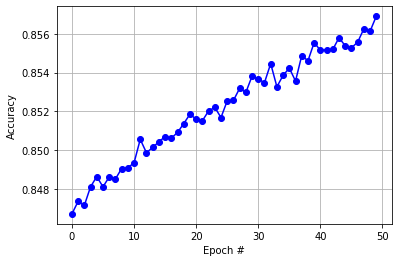

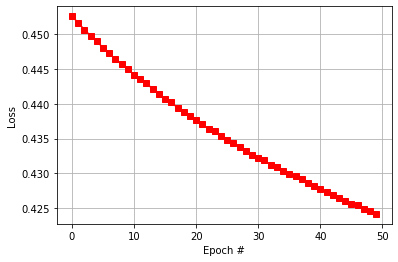

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(trHistory.history['accuracy'], 'b-o')
#plt.plot(trHistory.history['loss'])
plt.grid(True)
plt.xlabel('Epoch #')
plt.ylabel("Accuracy")

plt.figure(2)
plt.plot(trHistory.history['loss'],'r-s')
plt.grid(True)
plt.xlabel('Epoch #')
plt.ylabel("Loss")
plt.show()

In [71]:
log_loss, log_accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', log_accuracy)

Test accuracy: 0.8526999950408936
